Part 1

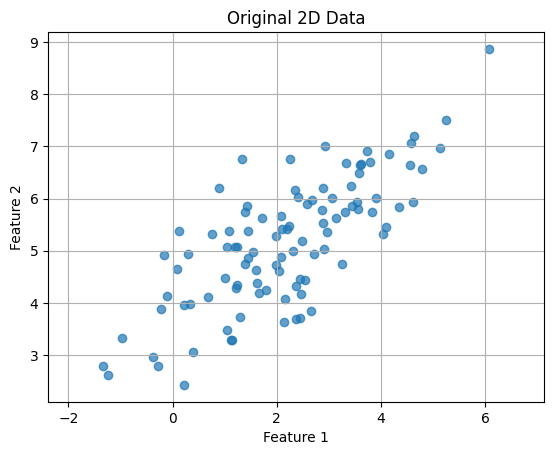

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 2D data
np.random.seed(42)
X = np.random.multivariate_normal(mean=[2, 5], cov=[[3, 2], [2, 2]], size=100)

# Plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Original 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis("equal")
plt.grid(True)
plt.show()

In [4]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered.T)  # Shape (2, 2)
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvals)
print("Eigenvectors:", eigenvecs)

Eigenvalues: [3.34538606 0.43692116]
Eigenvectors: [[ 0.79640776 -0.60476002]
 [ 0.60476002  0.79640776]]


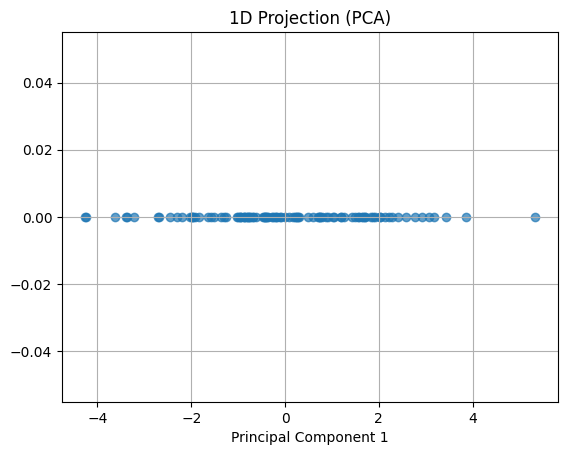

In [6]:
pc1 = eigenvecs[:, np.argmax(eigenvals)]  # Select eigenvector with largest eigenvalue
X_projected = X_centered.dot(pc1)
plt.scatter(X_projected, np.zeros_like(X_projected), alpha=0.7)
plt.title("1D Projection (PCA)")
plt.xlabel("Principal Component 1")
plt.grid(True)
plt.show()

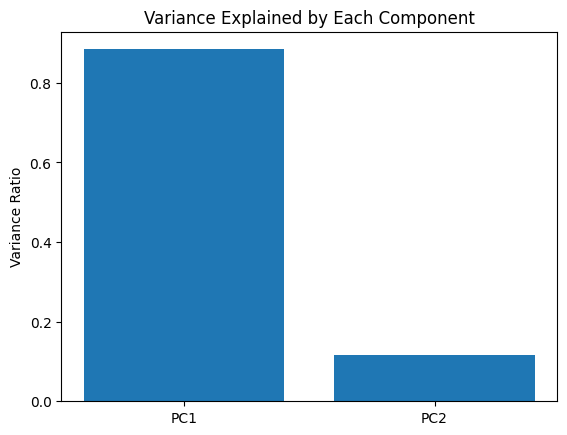

In [8]:
explained_variance = eigenvals / np.sum(eigenvals)
plt.bar([1, 2], explained_variance)
plt.title("Variance Explained by Each Component")
plt.xticks([1, 2], ["PC1", "PC2"])
plt.ylabel("Variance Ratio")
plt.show()

Part 2

In [10]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
digits = load_digits()
X, y = digits.data, digits.target  # X.shape = (1797, 64), y = labels (0-9)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

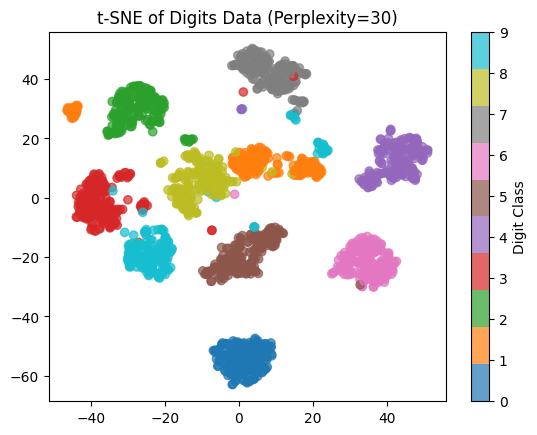

In [11]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", alpha=0.7)
plt.title("t-SNE of Digits Data (Perplexity=30)")
plt.colorbar(label="Digit Class")
plt.show()

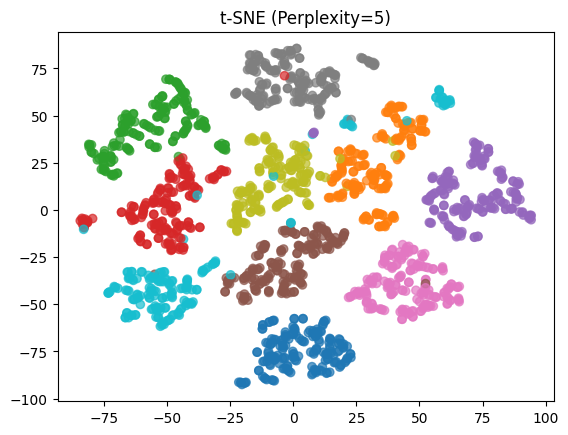

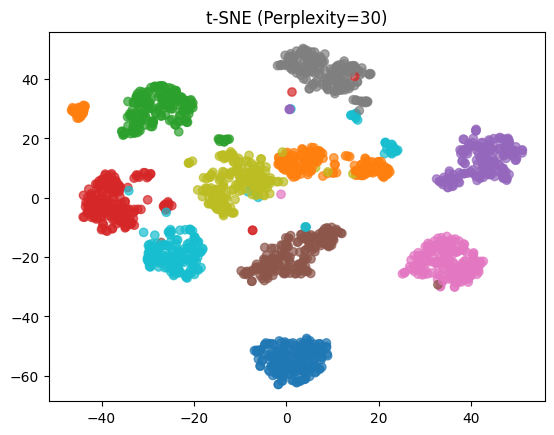

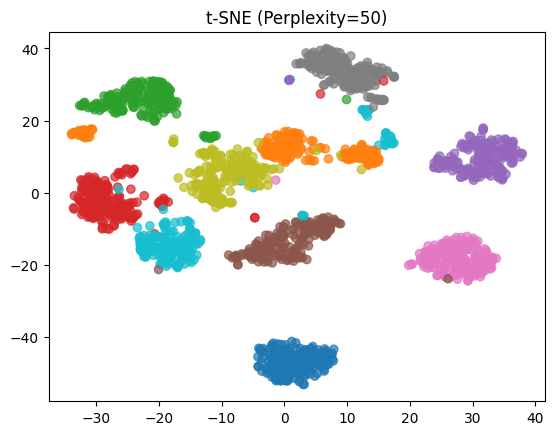

In [12]:
for perplexity in [5, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10", alpha=0.7)
    plt.title(f"t-SNE (Perplexity={perplexity})")
    plt.show()